In [27]:
import numpy as np
from getData import *
from matplotlib import pyplot as plt
import pandas as pd
from Algorithms import *

In [28]:
X,y = getRandom(amount = 100, classes = [0,1])
indPre,indAbs = getMissLabels(y,freq = 0.1)
X = X/255

In [29]:
XPre,yPre = X[indPre],y[indPre]
XAns,yAbs = X[indAbs],y[indAbs]

In [30]:
AllPre = np.concatenate((XPre,yPre.reshape(yPre.shape[0],1)),axis = 1)
D0 = getD(AllPre)
A0 = KnnE(D0,k=10)

<class 'int'>
<class 'int'>


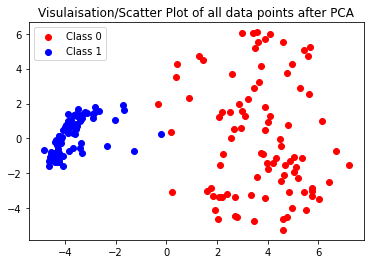

In [31]:
X_transformed = Transform(AllPre)
scatterPlot(X_transformed, yPre)

98.66777685262281 %


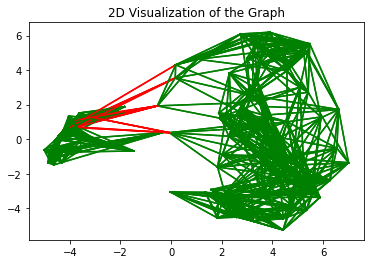

In [23]:
visualise(X_transformed,yPre,A0)

In [32]:
n = X.shape[0]
A0.resize((n,n))
k = 5

In [13]:
eff1 =[]
eff2 = []
eff3 = []
for k in range(1,11):
    A0 = KnnE(D0,k=k)
    A0.resize((n,n))
    effs = plot_Q2(A0,indAbs,XPre,yPre,X,y,k = k)
    eff1.append(effs[0])
    eff2.append(effs[1])
    eff3.append(effs[2])

(181,)
(182,)
(183,)
(184,)
(185,)
(186,)
(187,)
(188,)
(189,)
(190,)
(191,)
(192,)
(193,)
(194,)
(195,)
(196,)
(197,)
(198,)
(199,)
(200,)
(181,)
(182,)
(183,)
(184,)
(185,)
(186,)
(187,)
(188,)
(189,)
(190,)
(191,)
(192,)
(193,)
(194,)
(195,)
(196,)
(197,)
(198,)
(199,)
(200,)
(181,)
(182,)
(183,)
(184,)
(185,)
(186,)
(187,)
(188,)
(189,)
(190,)
(191,)
(192,)
(193,)
(194,)
(195,)
(196,)
(197,)
(198,)
(199,)
(200,)
(181,)
(182,)
(183,)
(184,)
(185,)
(186,)
(187,)
(188,)
(189,)
(190,)
(191,)
(192,)
(193,)
(194,)
(195,)
(196,)
(197,)
(198,)
(199,)
(200,)
(181,)
(182,)
(183,)
(184,)
(185,)
(186,)
(187,)
(188,)
(189,)
(190,)
(191,)
(192,)
(193,)
(194,)
(195,)
(196,)
(197,)
(198,)
(199,)
(200,)
(181,)
(182,)
(183,)
(184,)
(185,)
(186,)
(187,)
(188,)
(189,)
(190,)
(191,)
(192,)
(193,)
(194,)
(195,)
(196,)
(197,)
(198,)
(199,)
(200,)
(181,)
(182,)
(183,)
(184,)
(185,)
(186,)
(187,)
(188,)
(189,)
(190,)
(191,)
(192,)
(193,)
(194,)
(195,)
(196,)
(197,)
(198,)
(199,)
(200,)
(181,)
(182,)
(183,)

Text(0.5, 1.0, 'Efficiency of Semi-Supervised Graph Learning method')

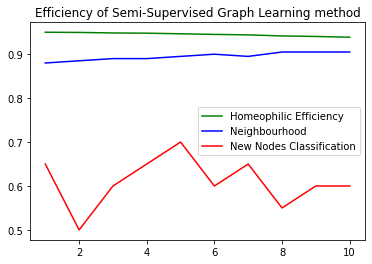

In [15]:
plt.plot(list(range(1,11)),eff1,color = 'green')
plt.plot(list(range(1,11)),eff2,color = 'blue')
plt.plot(list(range(1,11)),eff3, color = 'red')
plt.legend(["Homeophilic Efficiency","Neighbourhood","New Nodes Classification"])
plt.title("Efficiency of Semi-Supervised Graph Learning method")

In [9]:
print(effs)

[0.9613899613899614, 0.9, 0.7]


In [25]:
print(indAbs)
cnt1 = cnt2 = 0
for i in indAbs:
    x0,y0 = X[i],y[i]
    d = np.linalg.norm(XPre-x0,axis = 1)
    neighbours = np.argpartition(d,k)[:k]
    cnt = 0.0
    for j in neighbours:
        cnt += y[j]/k
        A0[i,j] = 1
        A0[j,i] = 1
    XPre = np.concatenate((XPre,x0.reshape(1,x0.shape[0])),axis = 0)
    ypred = np.round(cnt)
    if(ypred == y[i]):
        cnt1 += 1
    else:
        cnt2 += 1
    yPre = np.concatenate((yPre,[np.round(cnt)]),axis = 0)
    print(yPre.shape)
print(cnt1/(cnt1+cnt2)*100," %")

[ 38  40 173  85  78 121 164  95   9 191 119 115 159  65  10  82   2 155
  36 198]
(181,)
(182,)
(183,)
(184,)
(185,)
(186,)
(187,)
(188,)
(189,)
(190,)
(191,)
(192,)
(193,)
(194,)
(195,)
(196,)
(197,)
(198,)
(199,)
(200,)
25.0  %


/usr/local/lib/python3.9/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


90.80627508208683 %


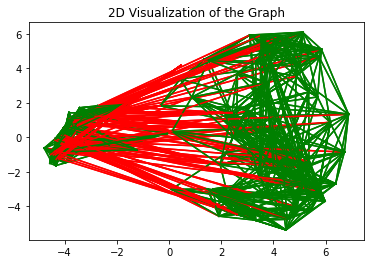

In [70]:
All = XPre
AllT = Transform(All)
visualise(AllT,yPre,A0)

In [33]:
k = 5
cnt1 = cnt2 = 0
for i in indAbs:
    x0,y0 = X[i],y[i]
    d = np.linalg.norm(XPre-x0,axis = 1)
    neighbours = np.argpartition(d,k)[:k]
    cnt = 0.0
    for j in neighbours:
        cnt += y[j]/k
        A0[i,j] = 1
        A0[j,i] = 1
    XPre = np.concatenate((XPre,x0.reshape(1,x0.shape[0])),axis = 0)
    ypred = np.round(cnt)
    if(ypred == y[i]):
        cnt1 += 1
    else:
        cnt2 += 1
    yPre = np.concatenate((yPre,[y[i]]),axis = 0)
    print(yPre.shape)
visualise(Transform(XPre),A0,yPre)

(181,)
(182,)
(183,)
(184,)
(185,)
(186,)
(187,)
(188,)
(189,)
(190,)
(191,)
(192,)
(193,)
(194,)
(195,)
(196,)
(197,)
(198,)
(199,)
(200,)


/usr/local/lib/python3.9/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


AttributeError: 'numpy.uint8' object has no attribute 'indices'

94.95145631067962 %


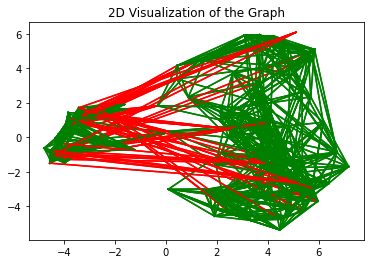

In [34]:
visualise(Transform(XPre),yPre,A0)